# Wave Equation

## Sophie Gee

## Vol 4

## 11/3/22

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani
from scipy.linalg import toeplitz
import scipy.optimize
import matplotlib.animation as animation

# Problem 1
Numerically approximate the solution to the following BVP

$$
u_{tt} = u_{xx} \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = \sin(2\pi x), \\
u_t(x,0) = 0. 
$$

Numerically approximate the solution $u(x,t)$ for $t\in[0,5]$. Use $J=50$ subintervals in the $x$ dimension and $M=50$ subintervals in the $t$ dimension. Animate the results. Compare you results with the analytic solution $u(x,t) = \sin(2\pi x)\cos(2\pi t).$ This function is know as a standing wave.

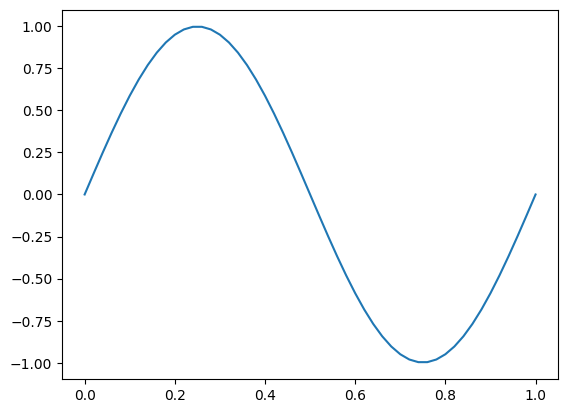

In [19]:
J_x = 50
M_t = 50
U = np.zeros((M_t + 1, J_x + 1))
x = np.linspace(0, 1, J_x + 1)
t = np.linspace(0, .5, M_t + 1)

U[0, :] = np.sin(2 * np.pi * x)
U[1, :] = U[0, :] + (1/8) * (np.roll(U[0, :], -1) - 2*U[0, :] + np.roll(U[0, :], 1))

# create a matrix A with .25's on off diagonal and 2*.75's on diagonal
c = np.zeros(J_x - 1)
c[0] = 2*.75
c[1] = .25
r = np.zeros(J_x - 1)
r[0] = 2*.75
r[1] = .25
A = toeplitz(c, r)
U[:, 0] = 0
U[:, -1] = 0

for m in range(1, M_t):
    U[m+1, 1:J_x] =A @ U[m, 1:J_x] - U[m-1, 1:J_x]
# print(U)
domain = np.linspace(0, 1, J_x + 1)
# animate 
fig = plt.figure()
wave, = plt.plot(domain, U[0])

#update function so that animation moves with time
def update(i):
    wave.set_data(domain, U[i])
    return wave

# create animation
ani = animation.FuncAnimation(fig, update, frames=range(1, len(U)), interval=25)
ani.save("my_animation.mp4")

<video src="my_animation.mp4" controls>

# Problem 2

Consider the boundary value problem 

$$
u_{tt} = u_{xx}, \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = 0.2e^{-,^2(x-1/2)^2} \\
y_t(x,0) = 0.4m^2(x-\frac{1}{2})e^{-m^2(x-1/2)^2}.
$$

The solution of this problem is ta Gaussian pulse. It travels to the right at a constant speed. This solution models, for example, a wave pulse in a stretched string. Note that the fixed boundart conditions reflect the pulse back when it meets the boundary.

Numerically approximate the solution $u(x,t)$ for $t\in[0,1]$. Set $m=20$. Use 200 subintervals in space and 220 in time, and animate your results. Then use 200 subintervals in space and 180 in time, and animate your results. Note that the stability condition is not satisfied for the second mesh.

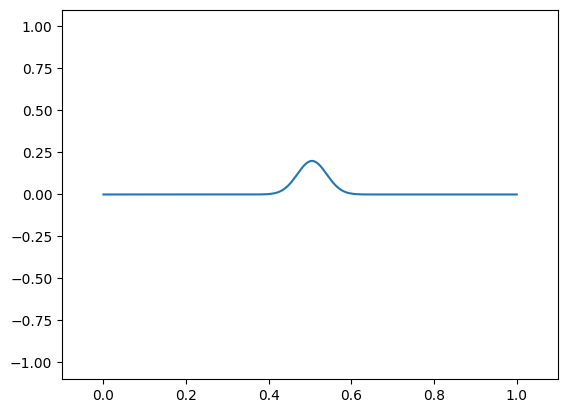

In [23]:
J_x = 200
M_t = 220
m = 20

U = np.zeros((M_t + 1, J_x + 1))
x = np.linspace(0, 1, J_x + 1)
t = np.linspace(0, 1, M_t + 1)
delta_t = 1/M_t

u_t = 0.4*m**2*(x - 1/2)*np.exp(-m**2*(x - 1/2)**2)
lmda = J_x / M_t

U[0, :] = .2*np.exp(-m**2*(x - 1/2)**2)
U[1, :] = U[0, :] + delta_t*u_t + ((lmda**2) / 2) * (np.roll(U[0, :], -1) - 2*U[0, :] + np.roll(U[0, :], 1))

# create a matrix A with .25's on off diagonal and 2*.75's on diagonal
c = np.zeros(J_x - 1)
c[0] = 2*(1 - lmda**2)
c[1] = lmda**2
r = np.zeros(J_x - 1)
r[0] = 2*(1-lmda**2)
r[1] = lmda**2
A = toeplitz(c, r)
U[:, 0] = 0
U[:, -1] = 0



for m in range(1, M_t):
    U[m+1, 1:J_x] =A @ U[m, 1:J_x] - U[m-1, 1:J_x]
# print(U)
domain = np.linspace(0, 1, J_x + 1)
# animate 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-.1, 1.1))
ax.set_ylim((-1.1, 1.1))
wave, = plt.plot(domain, U[0])

#update function so that animation moves with time
def update(i):
    wave.set_data(domain, U[i])
    return wave

# create animation
ani = animation.FuncAnimation(fig, update, frames=range(1, len(U)), interval=25)
ani.save("problem_2.mp4")

<video src="problem_2.mp4" controls>

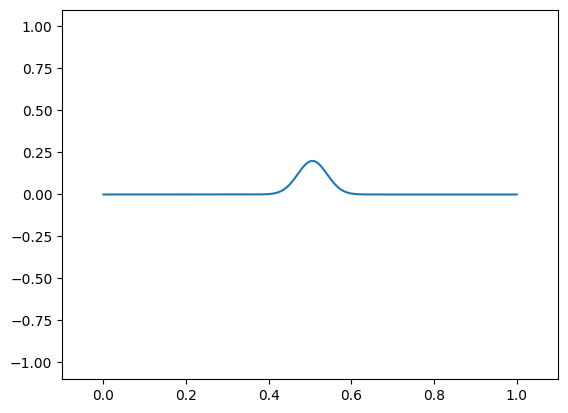

In [24]:
J_x = 200
M_t = 180
m = 20

U = np.zeros((M_t + 1, J_x + 1))
x = np.linspace(0, 1, J_x + 1)
t = np.linspace(0, 1, M_t + 1)
delta_t = 1/M_t

u_t = 0.4*m**2*(x - 1/2)*np.exp(-m**2*(x - 1/2)**2)
lmda = J_x / M_t

U[0, :] = .2*np.exp(-m**2*(x - 1/2)**2)
U[1, :] = U[0, :] + delta_t*u_t + ((lmda**2) / 2) * (np.roll(U[0, :], -1) - 2*U[0, :] + np.roll(U[0, :], 1))

# create a matrix A with .25's on off diagonal and 2*.75's on diagonal
c = np.zeros(J_x - 1)
c[0] = 2*(1 - lmda**2)
c[1] = lmda**2
r = np.zeros(J_x - 1)
r[0] = 2*(1-lmda**2)
r[1] = lmda**2
A = toeplitz(c, r)
U[:, 0] = 0
U[:, -1] = 0



for m in range(1, M_t):
    U[m+1, 1:J_x] =A @ U[m, 1:J_x] - U[m-1, 1:J_x]
# print(U)
domain = np.linspace(0, 1, J_x + 1)
# animate 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-.1, 1.1))
ax.set_ylim((-1.1, 1.1))
wave, = plt.plot(domain, U[0])

#update function so that animation moves with time
def update(i):
    wave.set_data(domain, U[i])
    return wave

# create animation
ani = animation.FuncAnimation(fig, update, frames=range(1, len(U)), interval=25)
ani.save("problem_2A.mp4")

<video src="problem_2A.mp4" controls>

# Problem 3

Consider the initial boundary value problem
$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = 0.2e^{-m^2(x-1/2)^2}\\
	u_t(x,0) = 0.
$$
The initial condition separates into two smaller, slower-moving pulses, one travelling to the right and the other to the left.
This solution models, for example, a plucked guitar string

Numerically approximate the solution $u(x,t)$ for $t \in \left[0,2\right]$.
Set $m=20$.
Use 200 subintervals in space and 440 in time, and animate your results.
It is rather easy to see that the solution to this problem is the sum of two travelling waves, one travelling to the left and the other to the right, as described earlier.

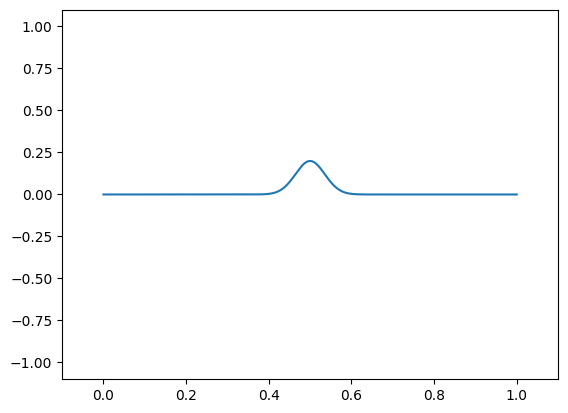

In [25]:
J_x = 200
M_t = 440
m = 20

U = np.zeros((M_t + 1, J_x + 1))
x = np.linspace(0, 1, J_x + 1)
t = np.linspace(0, 2, M_t + 1)
delta_t = 1/M_t

u_t = 0
lmda = J_x / M_t

U[0, :] = .2*np.exp(-m**2*(x - 1/2)**2)
U[1, :] = U[0, :] + delta_t*u_t + ((lmda**2) / 2) * (np.roll(U[0, :], -1) - 2*U[0, :] + np.roll(U[0, :], 1))

# create a matrix A with .25's on off diagonal and 2*.75's on diagonal
c = np.zeros(J_x - 1)
c[0] = 2*(1 - lmda**2)
c[1] = lmda**2
r = np.zeros(J_x - 1)
r[0] = 2*(1-lmda**2)
r[1] = lmda**2
A = toeplitz(c, r)
U[:, 0] = 0
U[:, -1] = 0



for m in range(1, M_t):
    U[m+1, 1:J_x] =A @ U[m, 1:J_x] - U[m-1, 1:J_x]
# print(U)
domain = np.linspace(0, 1, J_x + 1)
# animate 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-.1, 1.1))
ax.set_ylim((-1.1, 1.1))
wave, = plt.plot(domain, U[0])

#update function so that animation moves with time
def update(i):
    wave.set_data(domain, U[i])
    return wave

# create animation
ani = animation.FuncAnimation(fig, update, frames=range(1, len(U)), interval=25)
ani.save("problem_3.mp4")

<video src="problem_3.mp4" controls>

# Problem 4

Consider the initial boundary value problem

$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = \begin{cases} 1/3 & \text{if } 5/11 < x < 6/11,\\
	0 & \text{otherwise}
	\end{cases}\\
	u_t(x,0) = 0.
$$

Numerically approximate the solution $u(x,t)$ for $t \in \left[0, 2\right]$.
Use 200 subintervals in space and 440 in time, and animate your results.
Even though the method is second order and stable for this discretization, since the initial condition is discontinuous there are large dispersive errors.

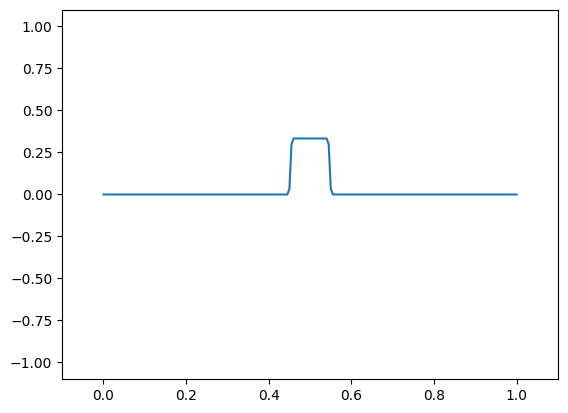

In [26]:
J_x = 200
M_t = 440
m = 20

U = np.zeros((M_t + 1, J_x + 1))
x = np.linspace(0, 1, J_x + 1)
t = np.linspace(0, 2, M_t + 1)
delta_t = 1/M_t

u_t = 0
lmda = J_x / M_t

U[0, :] = [1/3 if 5/11 < i < 6/11 else 0 for i in x]
U[1, :] = U[0, :] + delta_t*u_t + ((lmda**2) / 2) * (np.roll(U[0, :], -1) - 2*U[0, :] + np.roll(U[0, :], 1))

# create a matrix A with .25's on off diagonal and 2*.75's on diagonal
c = np.zeros(J_x - 1)
c[0] = 2*(1 - lmda**2)
c[1] = lmda**2
r = np.zeros(J_x - 1)
r[0] = 2*(1-lmda**2)
r[1] = lmda**2
A = toeplitz(c, r)
U[:, 0] = 0
U[:, -1] = 0



for m in range(1, M_t):
    U[m+1, 1:J_x] =A @ U[m, 1:J_x] - U[m-1, 1:J_x]
# print(U)
domain = np.linspace(0, 1, J_x + 1)
# animate 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-.1, 1.1))
ax.set_ylim((-1.1, 1.1))
wave, = plt.plot(domain, U[0])

#update function so that animation moves with time
def update(i):
    wave.set_data(domain, U[i])
    return wave

# create animation
ani = animation.FuncAnimation(fig, update, frames=range(1, len(U)), interval=25)
ani.save("problem_4.mp4")

<video src="problem_4.mp4" controls>

# Problem 5


Numerically solve the initial value problem

$$
	u_t -su_x + uu_x = u_{xx}, \quad x \in (-\infty,\infty),\\
	u(x,0) = v(x),
$$

for $t \in [0,1]$.
Let the perturbation $v(x)$ be given by

$$
v(x) = 3.5(\sin{(3x)} + 1)\frac{1}{\sqrt{2\pi}} \exp{(-x^2/2)}
$$

And let the initial condition be $u(x, 0) = \hat{u}(x) + v(x)$
Approximate the $x$ domain,$(-\infty, \infty)$, numerically by the finite interval $[-20,20]$, and fix $u(-20) = u_-$, $u(20) = u_+$. Let $u_- = 5$, $u_+ = 1$.
Use 150 intervals in space and 350 steps in time.
Animate your results.
You should see the solution converge to a translate of the travelling wave $\hat{u}$.

Hint: This difference scheme is no longer a linear equation.
We have a nonlinear equation in $U^{n+1}$.
We can still solve this function using Newton's method or some other similar solver.
In this case, use `scipy.optimize.fsolve`.

In [1]:
from scipy.optimize import fsolve
# Define the nonlinear implicit Crank-Nicholson equation
def fcn(u1, u0, s, k1, k2):
    col = u1.shape[-1]
    res = [u1[i] - u0[i] - k1*((s-u1[i])*(u1[i+1]-u1[i-1])+(s-u0[i])*(u0[i+1]-u0[i-1])) - k2*((u1[i+1] -2*u1[i] + u1[i-1]) + (u0[i+1] -2*u0[i] + u0[i-1])) for i in range(1, col-1)]
    res = [u1[0] - u0[0]] + res + [u1[-1] - u0[-1]]
    return res


In [9]:
# initial condition
J = 150
M = 350
x = np.linspace(-20, 20, J+1)
delta_x = 40 / J
delta_t = 1 / M
K1, K2 = delta_t / (4*delta_x), delta_t / (2*delta_x**2)
u_m = 5
u_p = 1
s = (u_m + u_p) / 2
a = (u_m - u_p) / 2
u = np.zeros((M+1, J+1))
u[0, 0], u[0, -1] = u_m, u_p

# set up v and u_hat
v = lambda x: 3.5*(np.sin(3*x) + 1)*(1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
u_hat = lambda x: s - a*np.tanh(a*x/2)
u[0, 1:-1] = [u_hat(x_i) + v(x_i) for x_i in x[1:-1]]
ensatz = u[0]

# find rows of u[1:]
for m in range(1, M+1):
    u[m] = fsolve(fcn, ensatz, args=(u[m-1], s, K1, K2))

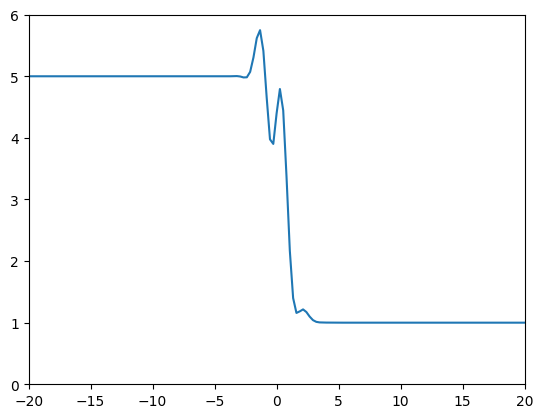

In [10]:
# animate the figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((x[0], x[-1]))
ax.set_ylim((0, 6))
wave, = plt.plot([], [], color='blue', alpha=0.5)

def update(i):
    ax.clear()
    ax.plot(x, u[i])
    ax.set_xlim((x[0], x[-1]))
    ax.set_ylim((0, 6))
ani = animation.FuncAnimation(fig, update, frames=range(350), interval=25)
ani.save("problem_5.mp4")

<video src="problem_5.mp4" controls>

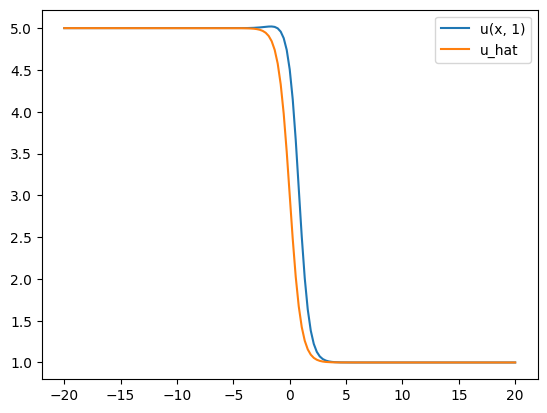

In [12]:
fig = plt.figure()
plt.plot(x, u[-1], label = "u(x, 1)")
plt.plot(x, u_hat(x), label = "u_hat")
plt.legend()
plt.show()